In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from statsmodels.iolib.summary2 import summary_col
path = 'data/final_cleaned_data.csv'
df = pd.read_csv(path).drop(columns='Unnamed: 0')
df

,ID,Gender,Age,Income,Exercise,Coffee,Tea,Soda,Milk,Juice,...,Brand_Reputation,Health_Benefit,Caffeine_Content,Price,Platforms,Units,Purpose,Motto_Price,Motto_Likelihood,Motto_Flavor
0,R_UEENeM2ghM5uKK5,Male,24,">150,000",4-6,4,5,1,1,2,...,4,5,3,0,In-Store Ads,Per Unit,Refreshment,4.0,7,Matcha
1,R_AzdTD7ACCdSVCTv,Male,23,"50,000-100,000",1-3,2,1,5,3,4,...,1,0,1,3,Word of Mouth,Bulk,Refreshment,0.0,0,Rooibos
2,R_2642Y0EiU2ABVzi,Male,24,"100,000-150,000",1-3,2,3,4,1,4,...,3,4,4,4,Word of Mouth,Per Unit,Refreshment,2.0,8,Matcha
3,R_1ONMulo6dpFaq04,Male,26,"<50,000",0,2,4,1,5,2,...,1,5,5,1,Instagram,Per Unit,Increased Focus,6.0,7,Matcha
4,R_1lo8HoT9csBWOxP,Female,24,"100,000-150,000",1-3,2,3,1,2,3,...,1,5,5,3,Word of Mouth,Per Unit,Increased Focus,6.5,7,Matcha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,R_3lQDroR045aAk6M,Female,23,">150,000",4-6,4,3,3,2,2,...,3,3,5,1,In-Store Ads,Per Unit,Energy Boost,5.0,3,Matcha
98,R_3KPE06VqIEladT4,Female,19,"50,000-100,000",1-3,4,5,2,4,4,...,5,5,4,4,In-Store Ads,Per Unit,Refreshment,3.0,7,Matcha
99,R_3lyPQPa7kP0tEis,Female,21,">150,000",0,1,4,2,1,3,...,3,4,0,0,Word of Mouth,Per Unit,Refreshment,4.0,9,Matcha
100,R_3qD4xaOcxjG2EXM,Male,21,"50,000-100,000",1-3,4,2,3,4,5,...,5,4,4,4,Word of Mouth,Bulk,Refreshment,5.0,8,Matcha


In [6]:
df.corr()[['Motto_Likelihood', 'Motto_Price']]

/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_61801/67622623.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[['Motto_Likelihood', 'Motto_Price']]


,Motto_Likelihood,Motto_Price
Age,-0.072317,0.066044
Coffee,0.157886,0.097941
Tea,0.319424,0.062812
Soda,-0.112965,-0.087804
Milk,0.075199,0.045727
Juice,-0.024100,-0.176158
EnergyDrink,0.044150,0.082147
SparklingWater,0.237347,0.026833
Alcohol,0.042745,0.090557
Ingredients_Quality,0.384122,0.162751


/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_61801/731107677.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_61801/731107677.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_61801/731107677.py:4: FutureWarning: The default value of numeric_only in DataF

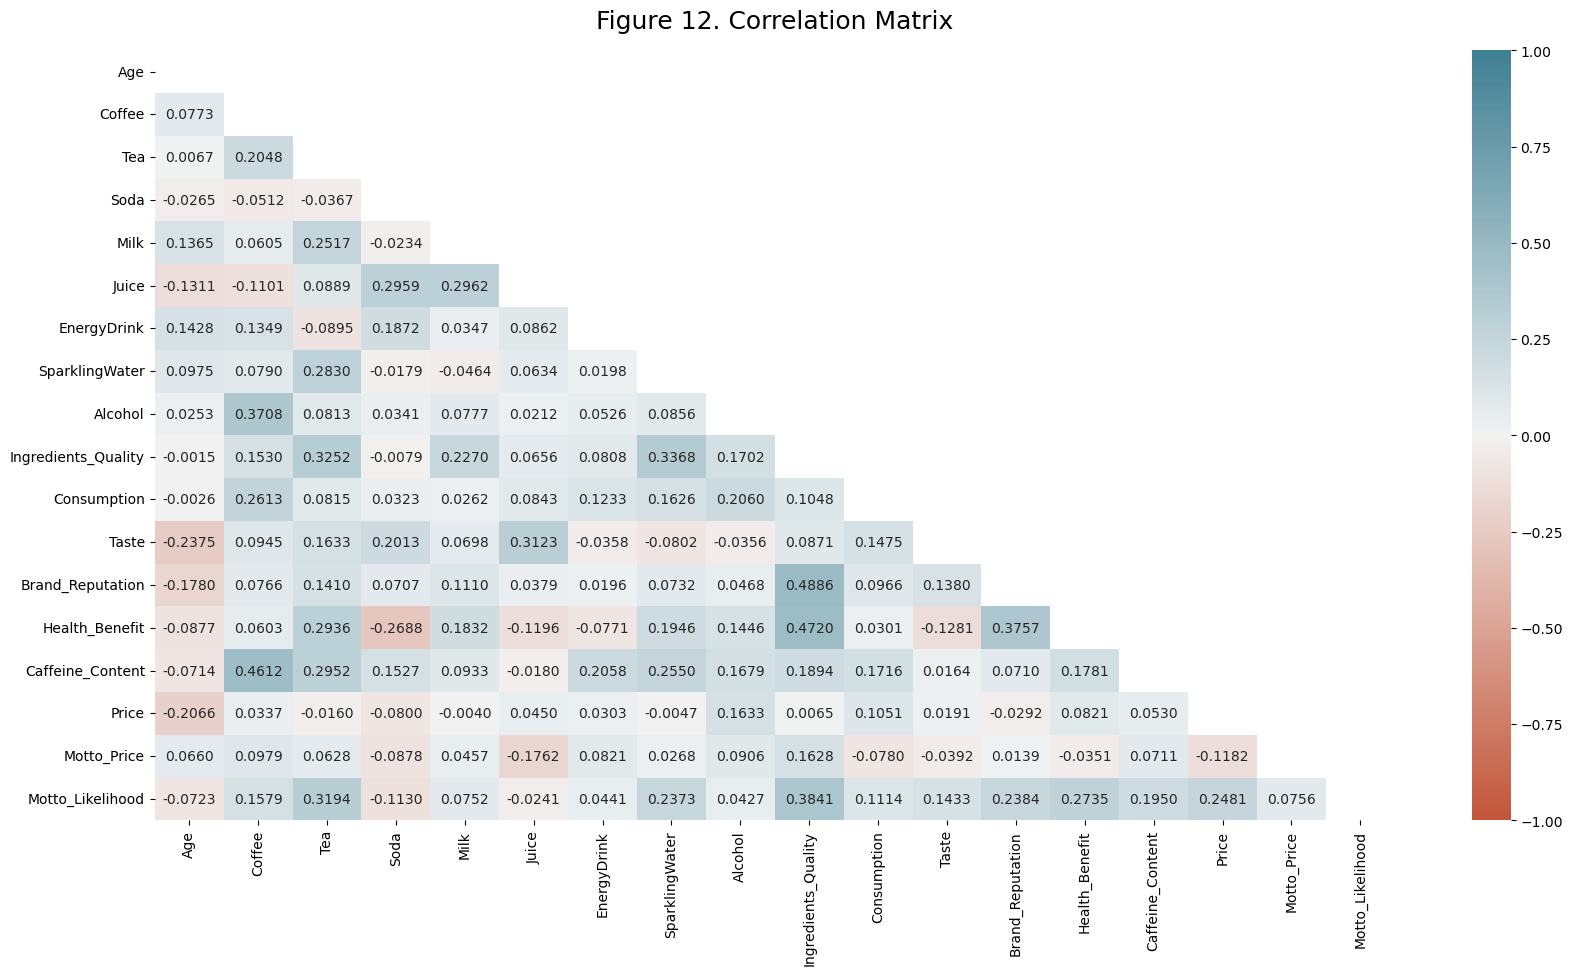

In [30]:
plt.figure(figsize=(20, 10))
palette = sns.diverging_palette(20, 220, n=256)
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap=palette, fmt='.4f')
heatmap.set_title('Figure 12. Correlation Matrix', fontdict={'fontsize':18}, pad=16);

/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_61801/236656514.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr()[['Motto_Likelihood', 'Motto_Price']], vmin=-1, vmax=1, annot=True, cmap=palette, fmt='.4f')


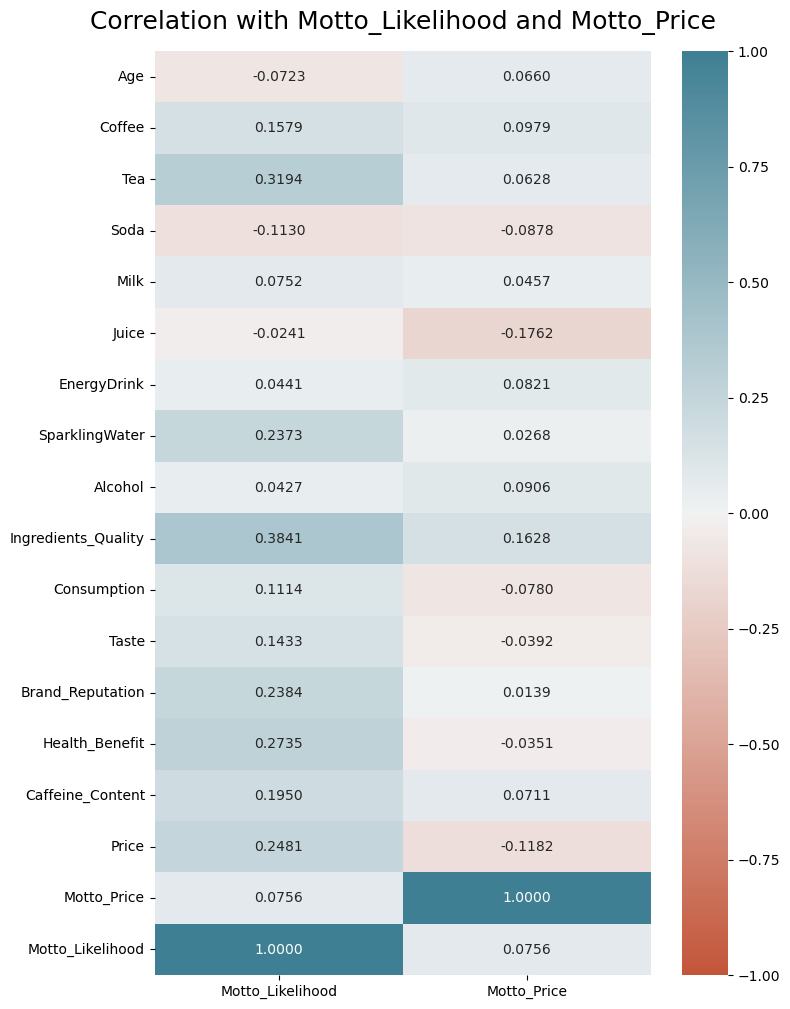

In [24]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Motto_Likelihood', 'Motto_Price']], vmin=-1, vmax=1, annot=True, cmap=palette, fmt='.4f')
heatmap.set_title('Correlation with Motto_Likelihood and Motto_Price', fontdict={'fontsize':18}, pad=16);

In [32]:
summ = smf.ols('Motto_Likelihood ~ Exercise', data = df).fit().summary()

In [34]:
summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Motto_Likelihood   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.6804
Date:                Mon, 08 May 2023   Prob (F-statistic):              0.566
Time:                        20:24:58   Log-Likelihood:                -239.20
No. Observations:                 102   AIC:                             486.4
Df Residuals:                      98   BIC:                             496.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.3750      0.644      8.347      0.000       4.097       6.653
Exercise[T.1-3]     0.5288      0.736      0.718      0.474      -0.933       1.990
Exercise[T.4-6]     0.6250      0.789      0.792      0.430      -0.940       2.190
Exercise[T.7+]      2.6250      1.932      1.359      0.177      -1.209       6.459
==============================================================================
Omnibus:                        5.855   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.984
Skew:                          -0.568   Prob(JB):                       0.0502
Kurtosis:                       2.656   Cond. No.                         9.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
pd.DataFrame(summ.tables[1]).to_csv('exercise.csv')